# **Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import altair as alt
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
!gdown --id  1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh

Downloading...
From: https://drive.google.com/uc?id=1WUNujZKdG56QZEY98_9SpWkIXGUGYMLh
To: /content/Ipl_dataset.zip
100% 2.58M/2.58M [00:00<00:00, 209MB/s]


In [5]:
!unzip '/content/Ipl_dataset.zip' -d '/content/data'

Archive:  /content/Ipl_dataset.zip
  inflating: /content/data/IPL Matches 2008-2020.csv  
  inflating: /content/data/IPL Ball-by-Ball 2008-2020.csv  
  inflating: /content/data/deliveries.csv  
  inflating: /content/data/matches.csv  


# **Loading** **Dataset**


In [10]:
df_ball_by_ball = pd.read_csv("/content/data/IPL Ball-by-Ball 2008-2020.csv")
df_ball_by_ball.head(5)

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [11]:
df_IPL_matches = pd.read_csv("/content/data/matches.csv")
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [12]:
df_deliveries = pd.read_csv("/content/data/deliveries.csv")
df_deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [13]:
df_IPL_matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
df_IPL_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
# looking for null values
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

# **Data Cleaning**

In [16]:
#Removing column with most null values
df_IPL_matches.drop(["umpire3"], axis = 1)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [17]:
#Filling the values of city based on venue
conditions = [df_IPL_matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",df_IPL_matches["venue"] == "Maharashtra Cricket Association Stadium",
              df_IPL_matches["venue"] == "Saurashtra Cricket Association Stadium", df_IPL_matches["venue"] == "Holkar Cricket Stadium",
              df_IPL_matches["venue"] == "M Chinnaswamy Stadium",df_IPL_matches["venue"] == "Wankhede Stadium",
              df_IPL_matches["venue"] == "Eden Gardens",df_IPL_matches["venue"] == "Feroz Shah Kotla",
              df_IPL_matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",df_IPL_matches["venue"] == "Green Park",
              df_IPL_matches["venue"] == "Punjab Cricket Association Stadium, Mohali",df_IPL_matches["venue"] == "Dr DY Patil Sports Academy",
              df_IPL_matches["venue"] == "Sawai Mansingh Stadium", df_IPL_matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              df_IPL_matches["venue"] == "Newlands", df_IPL_matches["venue"] == "St George's Park" , 
              df_IPL_matches["venue"] == "Kingsmead", df_IPL_matches["venue"] == "SuperSport Park",
              df_IPL_matches["venue"] == "Buffalo Park", df_IPL_matches["venue"] == "New Wanderers Stadium",
              df_IPL_matches["venue"] == "De Beers Diamond Oval", df_IPL_matches["venue"] == "OUTsurance Oval", 
              df_IPL_matches["venue"] == "Brabourne Stadium",df_IPL_matches["venue"] == "Sardar Patel Stadium", 
              df_IPL_matches["venue"] == "Barabati Stadium", df_IPL_matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              df_IPL_matches["venue"] == "Himachal Pradesh Cricket Association Stadium",df_IPL_matches["venue"] == "Nehru Stadium",
              df_IPL_matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",df_IPL_matches["venue"] == "Subrata Roy Sahara Stadium",
              df_IPL_matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",df_IPL_matches["venue"] == "JSCA International Stadium Complex",
              df_IPL_matches["venue"] == "Sheikh Zayed Stadium",df_IPL_matches["venue"] == "Sharjah Cricket Stadium",
              df_IPL_matches["venue"] == "Dubai International Cricket Stadium",df_IPL_matches["venue"] == "M. A. Chidambaram Stadium",
              df_IPL_matches["venue"] == "Feroz Shah Kotla Ground",df_IPL_matches["venue"] == "M. Chinnaswamy Stadium",
              df_IPL_matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,df_IPL_matches["venue"] == "IS Bindra Stadium",df_IPL_matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
df_IPL_matches['city'] = np.where(df_IPL_matches['city'].isnull(),
                              np.select(conditions, values),
                              df_IPL_matches['city'])

#Removing records having null values in "winner" column
df_IPL_matches=df_IPL_matches[df_IPL_matches["winner"].notna()]
df_IPL_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [18]:
df_IPL_matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               0
win_by_runs          0
win_by_wickets       0
player_of_match      0
venue                0
umpire1              2
umpire2              2
umpire3            634
dtype: int64

In [19]:
#checking unique elements
for team in df_IPL_matches['team1'].unique():
    print(team)


Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiant
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Rising Pune Supergiants
Delhi Capitals


In [20]:
for team in df_IPL_matches['team2'].unique():
    print(team)
## Similarly same anomaly could be found in winner & toss_winner Columns

Royal Challengers Bangalore
Rising Pune Supergiant
Kolkata Knight Riders
Kings XI Punjab
Delhi Daredevils
Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rajasthan Royals
Chennai Super Kings
Deccan Chargers
Pune Warriors
Kochi Tuskers Kerala
Rising Pune Supergiants
Delhi Capitals


In [21]:
#Replacing the Rising Pune Supergiant with Rising Pune Supergiants
df_IPL_matches["team2"]=df_IPL_matches["team2"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["team1"]=df_IPL_matches["team1"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["winner"]=df_IPL_matches["winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
df_IPL_matches["toss_winner"]=df_IPL_matches["toss_winner"].replace("Rising Pune Supergiant","Rising Pune Supergiants")
#####
for team in df_IPL_matches['team1'].unique():
    print(team)


Sunrisers Hyderabad
Mumbai Indians
Gujarat Lions
Rising Pune Supergiants
Royal Challengers Bangalore
Kolkata Knight Riders
Delhi Daredevils
Kings XI Punjab
Chennai Super Kings
Rajasthan Royals
Deccan Chargers
Kochi Tuskers Kerala
Pune Warriors
Delhi Capitals


In [22]:
#outcome variable team1_win as a probability of team1 winning the match
df_IPL_matches.loc[df_IPL_matches["winner"]==df_IPL_matches["team1"],"team1_win"]=1
df_IPL_matches.loc[df_IPL_matches["winner"]!=df_IPL_matches["team1"],"team1_win"]=0

#outcome variable team1_toss_win as a value of team1 winning the toss
df_IPL_matches.loc[df_IPL_matches["toss_winner"]==df_IPL_matches["team1"],"team1_toss_win"]=1
df_IPL_matches.loc[df_IPL_matches["toss_winner"]!=df_IPL_matches["team1"],"team1_toss_win"]=0

#outcome variable team1_bat to depict if team1 bats first
df_IPL_matches["team1_bat"]=0
df_IPL_matches.loc[(df_IPL_matches["team1_toss_win"]==1) & (df_IPL_matches["toss_decision"]=="bat"),"team1_bat"]=1
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1.0,1.0,1


In [23]:
#resetting index values
df_IPL_matches= df_IPL_matches.reset_index(drop=True)
df_IPL_matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,team1_win,team1_toss_win,team1_bat
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1.0,0.0,0
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,Rising Pune Supergiants,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0.0,0.0,0
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0.0,0.0,0
3,4,2017,Indore,2017-04-08,Rising Pune Supergiants,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0.0,0.0,0
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1.0,1.0,1


# **Exploratory Data** **Analysis**

In [24]:
# What is the maximum number of wins by any team in particular seasons?
teams_per_season = df_IPL_matches.groupby('season')['winner'].value_counts()
teams_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [25]:
#Creating a dataframe for the same
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1 

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [26]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


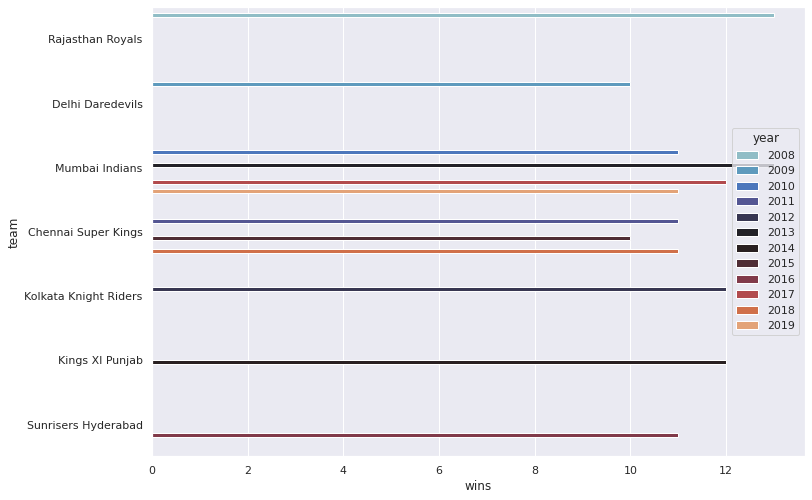

In [27]:
sns.barplot( x= 'wins', y = 'team', hue='year', data=win_per_season_df, palette='icefire');


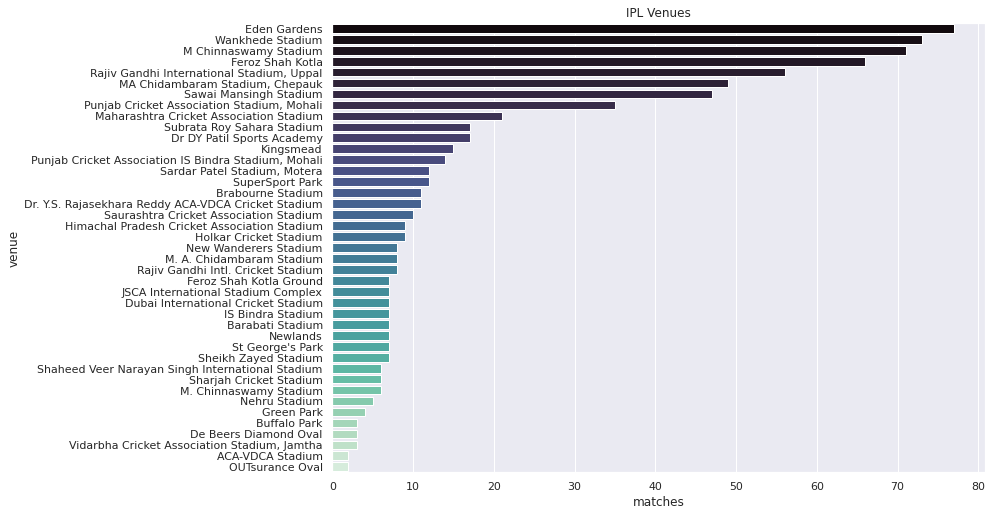

In [28]:
# Which stadium hosted the most number of IPL matches?
#dataframe for venue and matches is created first and then it is plotted 
venue_ser = df_IPL_matches['venue'].value_counts()
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df , palette= "mako" );

In [29]:
# Which team has won the most number/percentage of matches?
df_IPL_matches['winner'].value_counts().index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Pune Warriors',
       'Delhi Capitals', 'Kochi Tuskers Kerala'],
      dtype='object')

In [30]:
#dataframe for team and number of wins is created first and then it is plotted 
team_wins_ser = df_IPL_matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiants,15


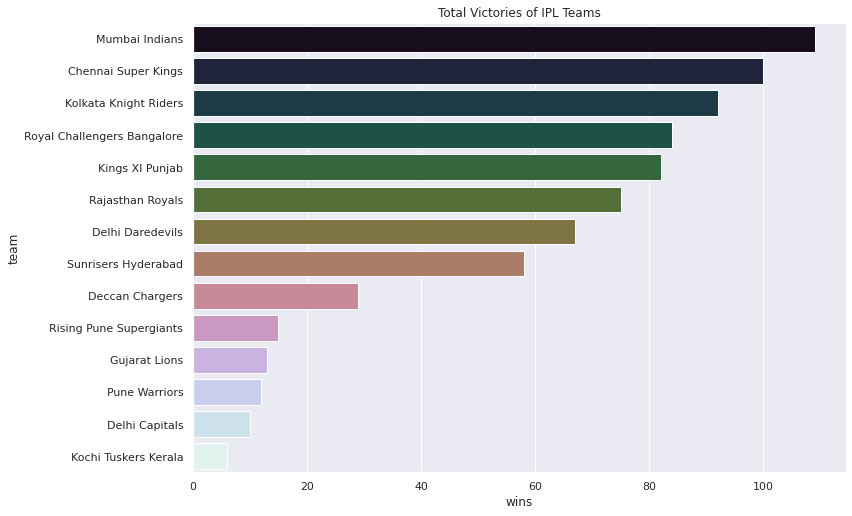

In [31]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='cubehelix');

In [32]:
# Which player has won the most number of Man of the Match (MoM) awards??
#dataframe is created for player of the match by first using value_count
mvp_ser = df_IPL_matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1  
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,AM Rahane,12


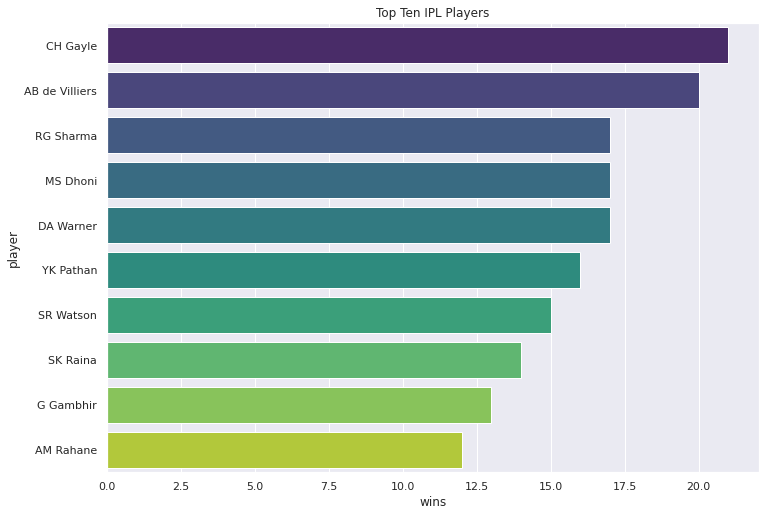

In [33]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='viridis');

In [34]:
# Which team has won the most tosses?
#dataframe for no. of tosses is createc first then plotted
toss_ser = df_IPL_matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Kings XI Punjab,81
4,Royal Challengers Bangalore,80
5,Delhi Daredevils,79
6,Rajasthan Royals,78
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


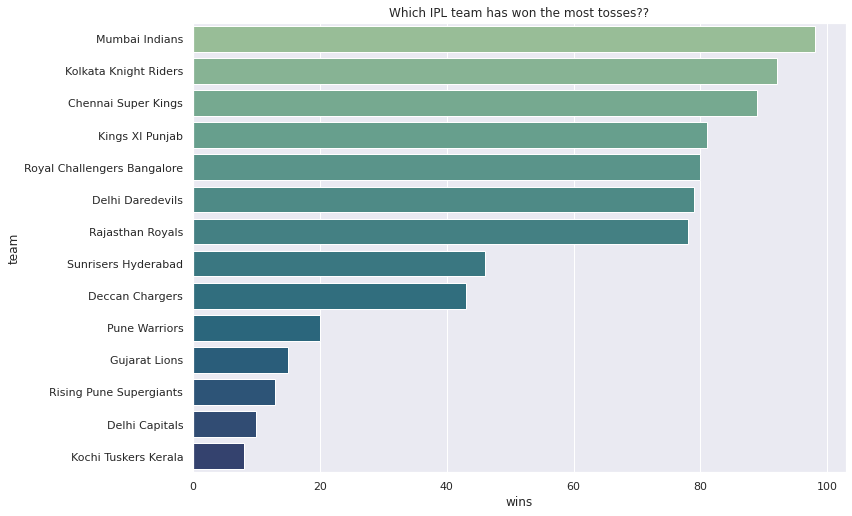

In [35]:
plt.title("Which IPL team has won the most tosses??")
sns.barplot(x='wins', y='team', data=toss_df, palette='crest');

In [36]:
len(df_IPL_matches)

752

In [40]:
# What are the top 10 greatest victories (by runs and by wickets)?
runs_vict = df_IPL_matches['win_by_runs'].value_counts()
win_by_run=pd.DataFrame(columns=['Runs','Tot_wins_run'])
for value in runs_vict.iteritems():
  run= pd.DataFrame({
        'Runs' : [value[0]],
        'Tot_wins_run' : [value[1]]
    })
  win_by_run=win_by_run.append(run)
win_by_run['Runs']=win_by_run['Runs'].sort_values(ascending=True)
win_by_run=win_by_run[79:]
winner=[]
for runs in win_by_run['Runs']:
  for index, row in df_IPL_matches.iterrows():
    if(row['win_by_runs'] == runs):
      winner.append(row['winner'])
win_by_run["Winning_team"]=winner
win_by_run
#Maximum win by run is by 146 runs and its only one time

,Runs,Tot_wins_run,Winning_team
0,98,1,Mumbai Indians
0,102,1,Mumbai Indians
0,105,1,Rajasthan Royals
0,111,1,Kings XI Punjab
0,118,1,Sunrisers Hyderabad
0,130,1,Royal Challengers Bangalore
0,138,1,Royal Challengers Bangalore
0,140,1,Kolkata Knight Riders
0,144,1,Royal Challengers Bangalore
0,146,1,Mumbai Indians


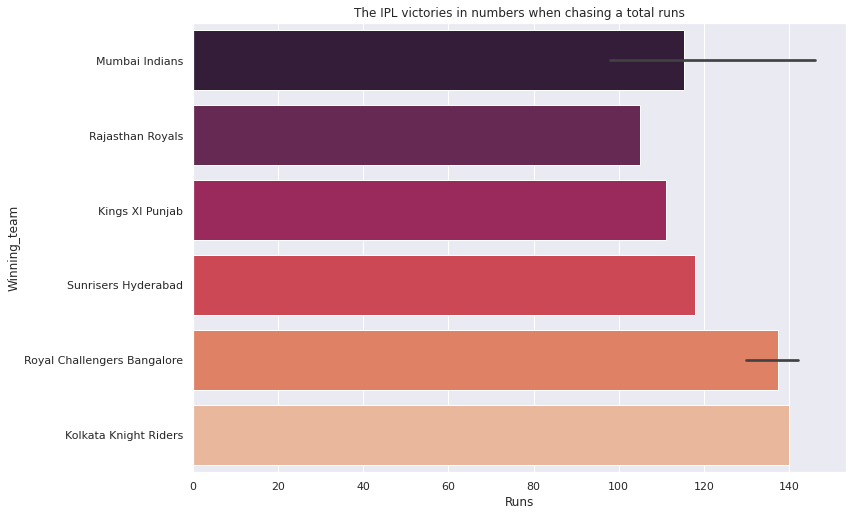

In [45]:
plt.title('The IPL victories in numbers when chasing a total runs')
sns.barplot(x='Runs', y='Winning_team',data=win_by_run , palette= "rocket")


In [43]:
ball_vict = df_IPL_matches['win_by_wickets'].value_counts()
win_by_wicket=pd.DataFrame(columns=['Wickets','Tot_wins_wickets'])
for value in ball_vict.iteritems():
  wicket= pd.DataFrame({
        'Wickets' : [value[0]],
        'Tot_wins_wickets' : [value[1]]
    })
  win_by_wicket=win_by_wicket.append(wicket)
win_by_wicket['Wickets']=win_by_wicket['Wickets'].sort_values(ascending=True)
win_by_wicket
#Maximum wins by wicket is by 10 wickets and its 3 times

,Wickets,Tot_wins_wickets
0,0,346
0,1,85
0,2,80
0,3,71
0,4,54
0,5,41
0,6,37
0,7,18
0,8,11
0,9,6


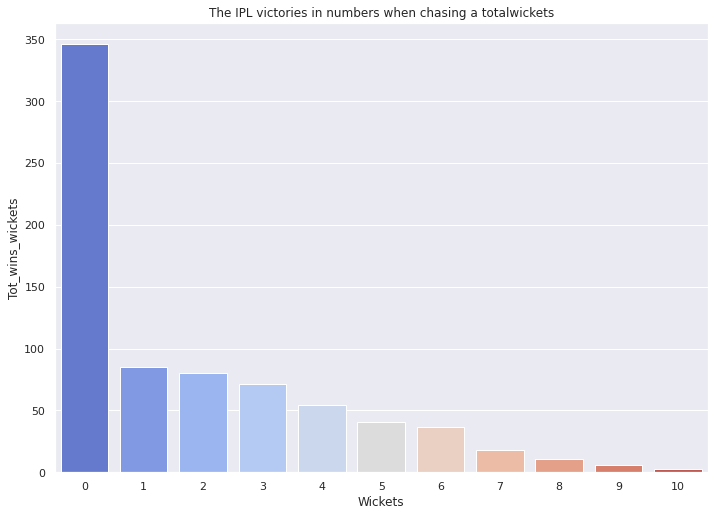

In [46]:
plt.title('The IPL victories in numbers when chasing a totalwickets')
sns.barplot(x='Wickets', y='Tot_wins_wickets', data=win_by_wicket , palette = "coolwarm")

In [133]:
# Comparison between any given batsmen
# defining centuries and half centuries
s_man_of_match = (df_IPL_matches.groupby(df_IPL_matches.player_of_match).player_of_match.count().
                  sort_values(ascending=False).head(15))

df_man_of_match =(s_man_of_match.to_frame().rename
                  (columns = {"player_of_match": "times"}).reset_index())

cen =df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

half_cen =df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()
df_big = pd.merge(cen,half_cen, on='batsman',how='right')
df_big = df_big.fillna(0)


In [134]:
# defining strike rate , total runs, sixes and fours
df_strike_rate =df_deliveries.groupby(['batsman']).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns ={'batsman_runs' : 'strike rate'}, inplace=True)

df_runs_per_match =df_deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum' ,'mean','count'})
df_total_runs.rename(columns ={'sum' : 'batsman run','count' : 'match count','mean' :'average score'}, inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()

df_sixes =df_deliveries[['batsman','batsman_runs']][df_deliveries.batsman_runs==6].groupby(['batsman']).agg({'batsman_runs':'count'})
df_four =df_deliveries[['batsman','batsman_runs']][df_deliveries.batsman_runs==4].groupby(['batsman']).agg({'batsman_runs':'count'})

In [135]:
#defining final batsman stats
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                    df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)
df_batsman_stat.rename(columns = {'ball' : 'Ball', 'strike rate':'Strike Rate','batsman run' : 'Batsman Run','match count' : 'Match Count',
                                  'average score' : 'Average score' ,'batsman_runs_x' :'Six','batsman_runs_y':'Four'},inplace=True)
df_batsman_stat['Strike Rate'] = df_batsman_stat['Strike Rate']*100
df_batsman_stat = df_batsman_stat.sort_values(by='Batsman Run',ascending=False).reset_index()

batsman_stats = pd.merge(df_batsman_stat,df_big, on='batsman',how='left').fillna(0)
batsman_stats.rename(columns = {'count_x' : '100s', 'count_y' : '50s'},inplace=True)

In [136]:
#creating points for centuries and runs
cen = batsman_stats[['100s','50s','batsman']]
cen['points'] = (cen['100s']*8) + (cen['50s']*4)
cen.sort_values(by='points',inplace=True,ascending=False)

runs = batsman_stats[['Six','Four','Batsman Run','batsman']]
runs['point'] = (runs['Six']*1) + (runs['Four']*0.5) + (runs['Batsman Run']*0.5)
runs.sort_values(by='point',inplace=True,ascending=False)

In [137]:
#merging final total points
final = pd.merge(cen,runs,on='batsman', how='inner')
final['total_points']=final['points']+final['point']
final['max'] = final['100s']+final['50s']

final.sort_values(by='total_points',ascending=False,inplace=True)
best_batsman = final[['batsman','total_points']]

In [138]:
#percentage value of each parameter
final['Batsman Run'] = (final['Batsman Run'])/(final['Batsman Run'].max()/100)
final['Six'] = (final['Six'])/(final['Six'].max()/100)
final['Four'] = (final['Four'])/(final['Four'].max()/100)
final['max'] = (final['max'])/(final['max'].max()/100)
final['total_points'] = (final['total_points'])/(final['total_points'].max()/100)

In [ ]:
#giving values for batsmen and plotting graphs
x = final[final["batsman"] == "V Kohli"]
y = final[final["batsman"] == "CH Gayle"]
z = final[final["batsman"] == "S Dhawan"]

data = [go.Scatterpolar(
  r = [x['Four'].values[0],x['Six'].values[0],x['Batsman Run'].values[0],x['max'].values[0],x['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',opacity = 0.8,
  name = "V Kohli"),
        
    go.Scatterpolar(
  r = [y['Four'].values[0],y['Six'].values[0],y['Batsman Run'].values[0],y['max'].values[0],y['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar2",
    name = "CH Gayle" ),
       
    go.Scatterpolar(
  r = [z['Four'].values[0],z['Six'].values[0],z['Batsman Run'].values[0],z['max'].values[0],z['total_points'].values[0]],
  theta = ['Four','Six','Runs','Centuries','Points'],
  fill = 'toself',subplot = "polar3",
    name = "S Dhawan")]
layout = go.Layout(title = "Comparison Between V Kohli, CH Gayle, S Dhawan",
                   
                   polar = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0, 0.25],y = [0, 1])),
                  
                   polar2 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.35, 0.65],y = [0, 1])),
                  
                   polar3 = dict(radialaxis = dict(visible = True,range = [0, 100]),
                   domain = dict(x = [0.75, 1.0],y = [0, 1])),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
# scatter plot with y-axis as mean strike rate per over, x-axis as number of over, color according to batsmen(take top 20-30 batsmen according to score) and size as number of bowls faced by them 
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: #2BB338' if v else '' for v in is_max]
df_ball_by_ball.pivot_table(index='over',aggfunc='count',columns='ball',values='player_dismissed').style.apply(highlight_max).format("{:.1f}")

ball,1,2,3,4,5,6,7,8,9
over,,,,,,,,,
0,49.0,49.0,42.0,53.0,56.0,56.0,10.0,3.0,0.0
1,48.0,62.0,63.0,63.0,64.0,60.0,15.0,3.0,0.0
2,59.0,75.0,68.0,62.0,68.0,62.0,8.0,1.0,0.0
3,62.0,48.0,87.0,86.0,51.0,66.0,10.0,1.0,1.0
4,60.0,61.0,65.0,70.0,70.0,78.0,12.0,0.0,0.0
5,56.0,70.0,69.0,64.0,71.0,63.0,10.0,2.0,0.0
6,60.0,47.0,48.0,56.0,59.0,49.0,7.0,1.0,0.0
7,44.0,60.0,63.0,60.0,62.0,48.0,10.0,0.0,0.0
8,61.0,73.0,63.0,70.0,53.0,62.0,9.0,2.0,0.0


In [ ]:
#creating pivot table for each batsmen and ball
df_ball_by_ball.pivot_table(index='batsman',aggfunc='count',columns='ball',values='player_dismissed'
                ).sort_values(by=1,ascending=False).head(30
                ).style.apply(highlight_max).format("{:.1f}")

ball,1,2,3,4,5,6,7,8,9
batsman,,,,,,,,,
AM Rahane,29.0,20.0,22.0,27.0,14.0,12.0,1.0,0.0,0.0
RG Sharma,29.0,36.0,25.0,33.0,22.0,30.0,1.0,1.0,nan
S Dhawan,28.0,21.0,25.0,26.0,25.0,23.0,3.0,1.0,0.0
RV Uthappa,25.0,27.0,29.0,26.0,29.0,31.0,2.0,0.0,0.0
MK Pandey,25.0,15.0,20.0,19.0,12.0,15.0,3.0,0.0,0.0
V Kohli,25.0,30.0,30.0,29.0,29.0,17.0,2.0,1.0,0.0
AT Rayudu,23.0,13.0,20.0,26.0,16.0,18.0,6.0,1.0,0.0
MS Dhoni,22.0,23.0,19.0,21.0,18.0,18.0,5.0,0.0,0.0
KD Karthik,22.0,29.0,20.0,23.0,30.0,21.0,6.0,1.0,nan


In [ ]:
#creating table for batsman_runs
cm = sns.light_palette("blue", as_cmap=True)

df_=df_ball_by_ball.pivot_table(index='batsman',aggfunc='count',columns='batsman_runs',values='ball'
                  ).sort_values(by=4,ascending=False)
df_.head(30).style.format("{:.1f}").background_gradient(cmap=cm).apply(highlight_max)
df_.columns=df_.columns.map(lambda x:'r'+str(x))
# alt.Chart(df_).mark_area().encode(
# x='batsman',
# y='batsman_runs'
# )
df_.fillna(0)

batsman_runs,r0,r1,r2,r3,r4,r5,r6
batsman,,,,,,,
S Dhawan,1613.0,1637.0,236.0,20.0,591.0,2.0,109.0
DA Warner,1429.0,1348.0,317.0,19.0,510.0,1.0,195.0
V Kohli,1625.0,1919.0,346.0,13.0,504.0,0.0,202.0
SK Raina,1412.0,1666.0,264.0,11.0,493.0,1.0,194.0
G Gambhir,1357.0,1352.0,249.0,15.0,492.0,0.0,59.0
...,...,...,...,...,...,...,...
X Thalaivan Sargunam,9.0,6.0,2.0,0.0,0.0,0.0,0.0
Y Prithvi Raj,1.0,0.0,0.0,0.0,0.0,0.0,0.0
YA Abdulla,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# identify top key
key='batsman'
topbatsmen=df_ball_by_ball[key].value_counts()[:50].index

In [ ]:
#rectifying data for final graph
df_=df_ball_by_ball.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='batsman_runs'
                  )

df_=df_.fillna(0).reset_index()
df_.columns=['batsman','over','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)

In [ ]:
#plotting data
alt.data_transformers.disable_max_rows()

df_.columns
alt.Chart(df_[df_.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(
alt.X('over'),
alt.Y('mean(strike_rate)'),
color='batsman',
text="batsman",
size='balls',
opacity='runs',
tooltip=list(df_.columns)
).properties(width=600,height=500)

alt.Chart(...)

In [ ]:
#Most 50s and 100s scored
centuries = batsman_stats.sort_values(by='100s').tail(15)
half_centuries = batsman_stats.sort_values(by='50s').tail(15)

fig = {"data" : [{"x" : centuries["batsman"],"y" : centuries["100s"],
                  "name" : "100s","marker" : {"color" : "#4F7943","size": 12},
                  "line": {"width" : 3},"type" : "scatter","mode" : "lines+markers" ,
                  "xaxis" : "x1","yaxis" : "y1"},
        
                 {"x" : half_centuries["batsman"],"y" : half_centuries["50s"],
                  "name" : "50s","marker" : {"color" : "#2BB338","size": 12},
                  "type" : "scatter","line": {"width" : 3},"mode" : "lines+markers",
                  "xaxis" : "x2","yaxis" : "y2"}],
       
        "layout" : {"title": "Total centuries and half-centuries by top batsman",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : True},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "50s"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear',"title": "Batsman"},
                    "yaxis" : {"domain" :[0, .45], "anchor" : "x2","title": "100s"}}}

iplot(fig)

In [ ]:
#comparing batsmen with highest points with an interactive table
cen = batsman_stats[['100s','50s','batsman']]
cen['points'] = (cen['100s']*8) + (cen['50s']*4)
cen.sort_values(by='points',inplace=True,ascending=False)
trace = go.Table(
    domain=dict(x=[0, 0.55],
                y=[0, 1.0]),
    header=dict(values=["Batsman","Points","100s","50s"],
                fill = dict(color = '#77AC68 '),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[cen['batsman'].head(10), cen['points'].head(10), cen['100s'].head(10), cen['50s'].head(10)],
               fill = dict(color = ['#A6CE9A', 'white']),
               align = ['center']))

trace1 = go.Bar(x=cen['batsman'].head(10),
                y=cen["points"].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='#3C9460'),opacity=0.80)
layout = dict(
    width=830,
    height=415,
    autosize=False,
    title='Batsman with highest points by centuries and half centuries',
    margin = dict(t=100),
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.65, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)

fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)